# Project Summary

This project is about some analysis on the data imdb.csv to find out some insights and trends like most popular genre of movies,average ratings, highest and lowest rated movies etc...

Project details:

Author: K.Santhosh

Date:10/2/2025

Version:1

problem statement:Analyze a dataset of movie ratings to uncover patterns.

# Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading datasets

In [48]:
data = pd.read_csv('/content/imdb.csv')

In [60]:
data['Runtime_in_min'] = pd.to_numeric(data['Runtime_in_min'], errors='coerce')  # Convert runtime to numeric
data['Gross_in_$_M'] = pd.to_numeric(data['Gross_in_$_M'], errors='coerce')  # Convert Gross to numeric
data['Metascore'] = pd.to_numeric(data['Metascore'], errors='coerce')  # Convert Metascore to numeric
data['Rating_from_10'] = pd.to_numeric(data['Rating_from_10'], errors='coerce')
data['Rank'] = pd.to_numeric(data['Rank'], errors='coerce')


# Standardize Text Fields
data['Movie_name'] = data['Movie_name'].str.strip().str.title()
data['Genre'] = data['Genre'].str.lower().str.replace(' & ', ', ')
data['Certificate'] = data['Certificate'].str.upper().str.strip()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            999 non-null    float64
 1   Movie_name      1000 non-null   object 
 2   Year            1000 non-null   object 
 3   Certificate     993 non-null    object 
 4   Runtime_in_min  1000 non-null   int64  
 5   Genre           1000 non-null   object 
 6   Metascore       840 non-null    float64
 7   Gross_in_$_M    812 non-null    float64
 8   Rating_from_10  1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


# Most popular Genre and average rating of them

In [58]:
genre_ratings = data.groupby('Genre')['Rating_from_10'].mean().sort_values(ascending=False)

In [59]:
print(genre_ratings)

Genre
adventure, western          8.8
crime, drama, fantasy       8.6
drama, family, fantasy      8.6
animation, drama, war       8.5
drama, mystery, war         8.5
                           ... 
animation, sci-fi           7.7
fantasy, mystery, sci-fi    7.6
action, crime, mystery      7.6
action, crime, sci-fi       7.6
drama, horror, mystery      7.6
Name: Rating_from_10, Length: 195, dtype: float64


* by groupby and mean function i have found out the mean of all the genre values and the highest of all

* From this, I can intepret that Adventure,Western genre of movies has the highest ratings overall

# Visualizing trends in movie rating

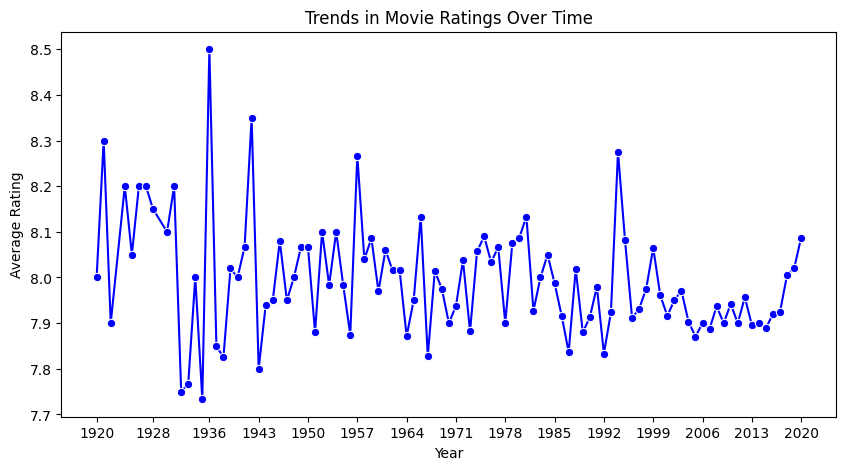

In [40]:
plt.figure(figsize=(10, 5))
yearly_ratings = data.groupby('Year')['Rating_from_10'].mean()
yearly_ratings.index = pd.to_numeric(yearly_ratings.index, errors='coerce')
yearly_ratings = yearly_ratings[yearly_ratings.index <= 2020]  # Ensure data stops at 2020
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trends in Movie Ratings Over Time')
plt.xticks(yearly_ratings.index[::7])  # Show every seventh year for better readability
plt.show()

* From this Graph we can find that the years between 1928 and 1936 has released the most lowest rated movies

* But after 1936 we can find that the average rating of movies has increased to a range of 8.5 imdb ratings which is the highest rating of all time

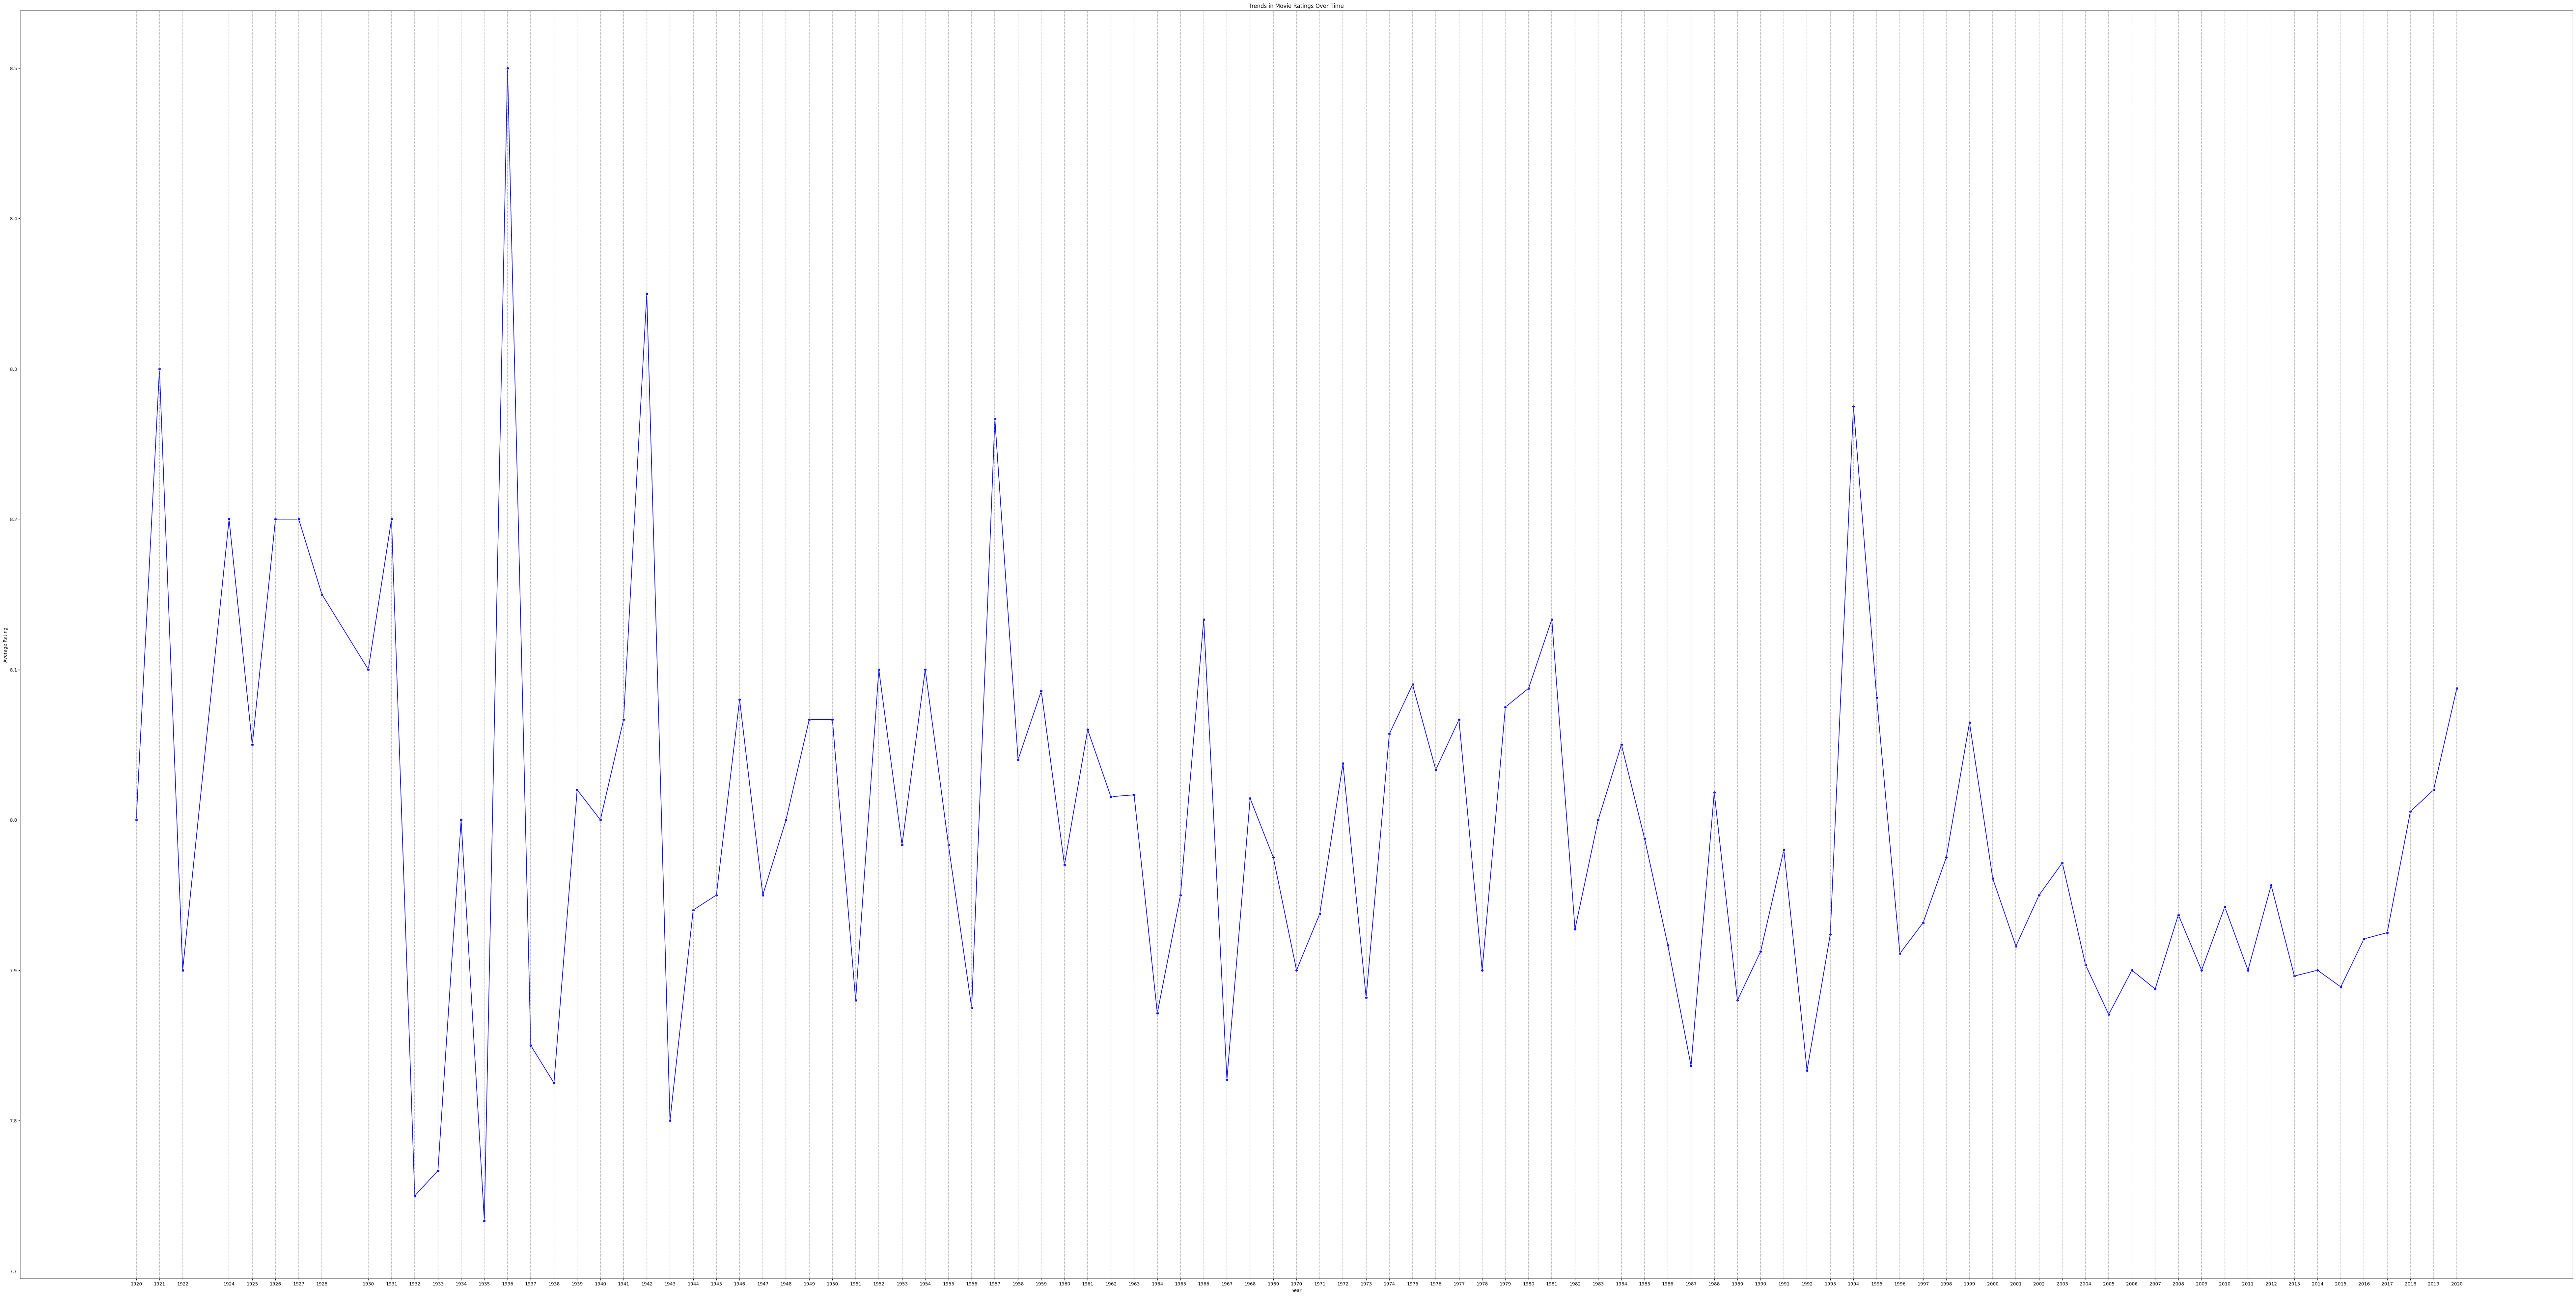

In [43]:
plt.figure(figsize=(100, 50))
yearly_ratings = data.groupby('Year')['Rating_from_10'].mean()
yearly_ratings.index = pd.to_numeric(yearly_ratings.index, errors='coerce')
yearly_ratings = yearly_ratings[yearly_ratings.index <= 2020]  # Ensure data stops at 2020
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trends in Movie Ratings Over Time')
plt.xticks(yearly_ratings.index[::])
for year in yearly_ratings.index:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5) # Show every seventh year for better readability
plt.show()

* From this enlarged graph we can intepret certain keypoints like:

* The ratings of the movies has almost never been constantly good or bad(it was very fluctuating) only for several exceptions like years from 1926-1927,1949-1950 and 1962-1963 where ratings of the movies remained constant

* The highest average rating movie was released in the year 1936

* The lowest average rating movie was released in the year 1935




# Word Cloud Visualization

In [45]:
text = ' '.join(data['Movie_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

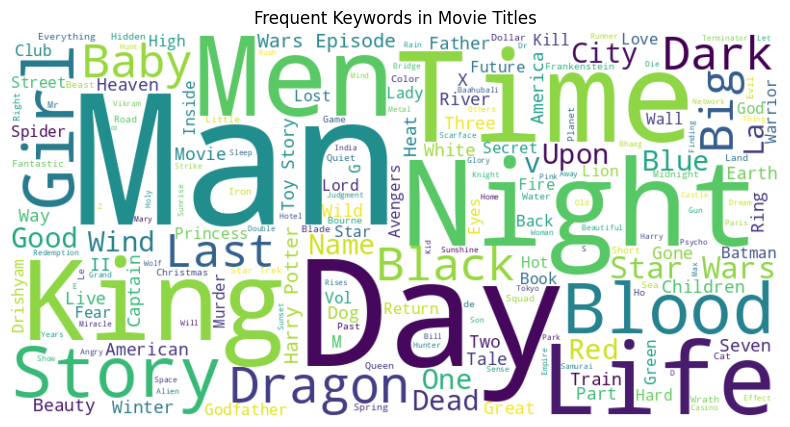

In [46]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Keywords in Movie Titles')
plt.show()

# Additional findings

In [47]:
highest_movie = data[data['Rating_from_10'] == data['Rating_from_10'].max()][['Movie_name', 'Rating_from_10']]
lowest_movie = data[data['Rating_from_10'] == data['Rating_from_10'].min()][['Movie_name', 'Rating_from_10']]
print("Highest Rated Movie:\n", highest_movie)
print("Lowest Rated Movie:\n", lowest_movie)


Highest Rated Movie:
                  Movie_name  Rating_from_10
0  The Shawshank Redemption             9.3
Lowest Rated Movie:
                           Movie_name  Rating_from_10
919                      Dark Waters             7.6
920    The Mitchells vs the Machines             7.6
921                        Searching             7.6
922    Once Upon a Time in Hollywood             7.6
923   Guardians of the Galaxy Vol. 2             7.6
..                               ...             ...
995                          Sabrina             7.6
996            From Here to Eternity             7.6
997  Snow White and the Seven Dwarfs             7.6
998                     The 39 Steps             7.6
999                The Invisible Man             7.6

[81 rows x 2 columns]


Looks like there are several lowest rated movies with the same rating(upto 81 movies).But there is only one Highest rated movie in this list which is "The Shawshank Redemption" which has the rating of 9.3 out of 10.

The movie is about a man named Andy Dufresne (Tim Robbins)  who is sentenced to two consecutive life terms in prison for the murders of his wife and her lover and is sentenced to a tough prison. However, only Andy knows he didn't commit the crimes. While there, he forms a friendship with Red (Morgan Freeman), experiences brutality of prison life, adapts, helps the warden, etc., all in 19 years.

Correlation Map

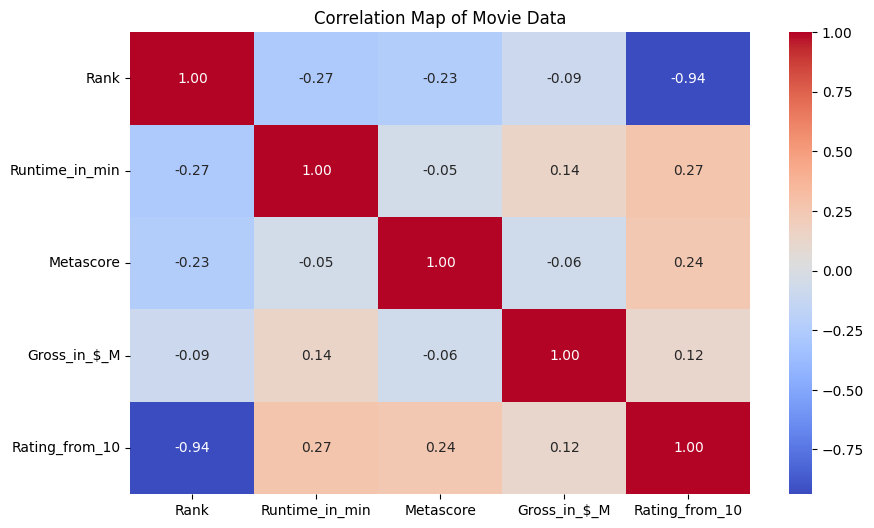

In [63]:
plt.figure(figsize=(10, 6))
corr_matrix = data[['Rank','Runtime_in_min', 'Metascore', 'Gross_in_$_M', 'Rating_from_10']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map of Movie Data')
plt.show()

It is obvious that rank and rating are negatively correlated upto 94% since as the rating increases the rank decreases.for example: Shawshank redemption has rating of 9.3 therfore it is ranked the first position.